## Table of Contents
<li><a href="#Web Scarping">Web Scarping</a></li>
<li><a href="#HTML in Python">HTML in Python</a></li>
<li><a href="#Flashforward">Flashforward</a></li>
<li><a href="#Source: Downloading Files from the Internet">Source: Downloading Files from the Internet</a></li>
<li><a href="#Source: APIs (Application Programming Interfaces)">Source: APIs (Application Programming Interfaces)</a></li>
<li><a href="#Relational Databases and pandas">Relational Databases and pandas</a></li>


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bestofrt.tsv', sep = '\t')

In [3]:
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


<a id='Web Scarping'></a>
### Web Scarping

In [4]:
import requests

In [5]:
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)

In [6]:
# saving HTML file
#with open('et_the_extraterrestrial.html', mode = 'wb') as file:
#   file.write(response.content)

In [7]:
# work with html in memory
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(response.content, 'lxml')

<a id='HTML in Python'></a>

### HTML in Python

In [9]:
from bs4 import BeautifulSoup

In [12]:
path = r'C:\Users\moham\Jupyter Notebook\Github\Professional Data Analysis\2 - Introduction to Data Analysis\2 - Gathering Data\rt_html\et_the_extraterrestrial.html'

In [13]:
with open (path) as file:
    soup = BeautifulSoup(file, 'lxml')

In [14]:
soup

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="application/ld+json">{"@context":"http

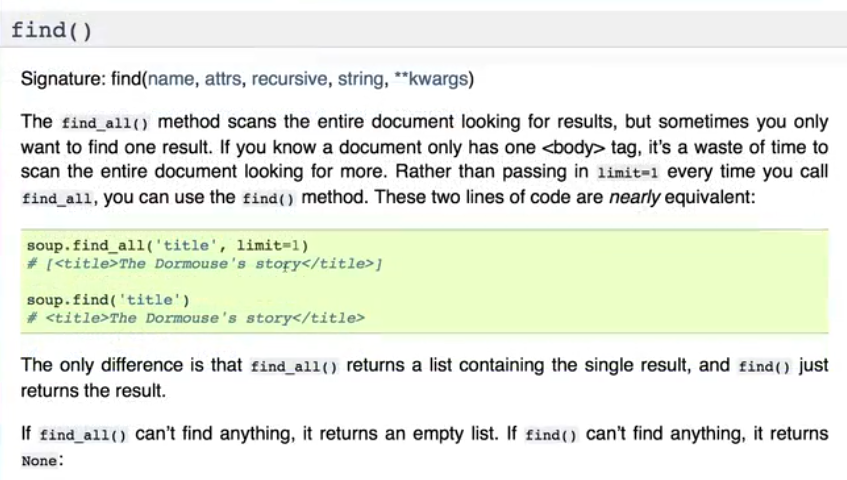

In [15]:
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

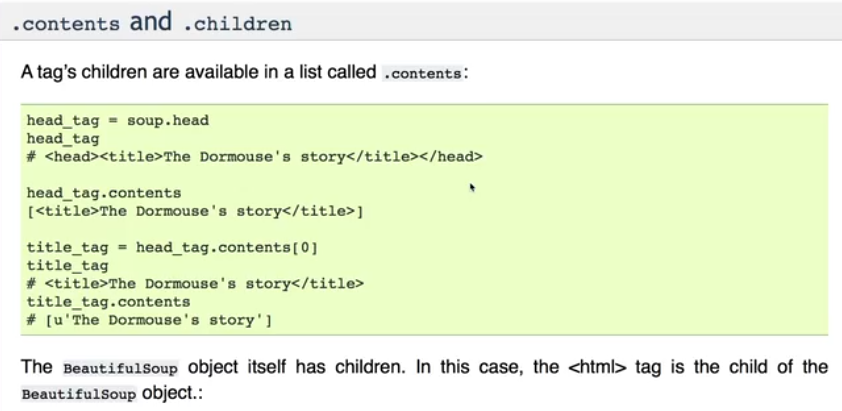

In [16]:
title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
title

'E.T. The Extra-Terrestrial\xa0(1982)'

#### To do for all file

In [17]:
import os
from bs4 import BeautifulSoup
import pandas as pd

In [18]:
# getting the titles of the movies
# getting the audience score
# number of audience ratings

df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_ = 'audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',', '')
        df_list.append({'title':title,
                       'audience_score':int(audience_score),
                       'number_of_audience_ratings': int(num_audience_ratings)})

In [19]:
df_audience = pd.DataFrame(df_list, columns=['title', 'audience_score', 'number_of_audience_ratings'])

In [20]:
df_audience.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768


In [21]:
df_audience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       100 non-null    object
 1   audience_score              100 non-null    int64 
 2   number_of_audience_ratings  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


<a id='Flashforward'></a>
### Flashforward

In [22]:
import matplotlib.pyplot as plt

In [23]:
df_critic = pd.read_csv('bestofrt.tsv', sep = '\t')
df_critic.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [24]:
df_audience.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768


In [25]:
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [26]:
for index, column in enumerate(df.columns):
    print(index, column)

0 ranking
1 critic_score
2 title
3 number_of_critic_ratings


In [27]:
df_audience.title = df_audience.title.apply(lambda title: title.replace('\xa0', ' '))

In [28]:
# getting index of specific value
df_audience.loc[df_audience.title == '12 Angry Men (Twelve Angry Men) (1957)'].index[0]

0

In [29]:
df_audience.title[1]

'The 39 Steps (1935)'

In [30]:
import numpy as np
scores_list = []
number_of_audience_ratings_list = []


In [31]:
index = 0
score = 0
number_of_audience = 0
for title in df_critic.title:
    if title in df_audience.title.tolist():
        index = df_audience.loc[df_audience.title == title].index[0]
        score = df_audience.audience_score[index]
        number_of_audience = df_audience.number_of_audience_ratings[index]
    else:
        score = np.nan
        number_of_audience = np.nan
    scores_list.append(score)
    number_of_audience_ratings_list.append(number_of_audience)

In [32]:
print(len(scores_list))
print(scores_list[:20])
print(len(number_of_audience_ratings_list))
print(number_of_audience_ratings_list[:20])

100
[89, 90, 93, 87, 86, 89, 94, 89, 98, 92, 72, 95, 93, 95, 81, 95, 80, 94, 91, 87]
100
[874425, 157274, 53081, 63837, 123937, 27163, 44564, 133558, 730433, 62018, 32313030, 39736, 33106, 137643, 88478, 355952, 41956, 238259, 10481, 47463]


In [33]:
df_audience.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768


In [34]:
df_audience.drop(columns=['title'], inplace=True)

In [35]:
df_audience.audience_score = scores_list
df_audience.number_of_audience_ratings = number_of_audience_ratings_list
df_audience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   audience_score              97 non-null     float64
 1   number_of_audience_ratings  97 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [36]:
df = pd.concat((df_critic, df_audience), axis = 1)

In [37]:
df.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89.0,874425.0
1,2,100,Citizen Kane (1941),75,90.0,157274.0
2,3,100,The Third Man (1949),77,93.0,53081.0
3,4,99,Get Out (2017),282,87.0,63837.0
4,5,97,Mad Max: Fury Road (2015),370,86.0,123937.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ranking                     100 non-null    int64  
 1   critic_score                100 non-null    int64  
 2   title                       100 non-null    object 
 3   number_of_critic_ratings    100 non-null    int64  
 4   audience_score              97 non-null     float64
 5   number_of_audience_ratings  97 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.8+ KB


In [39]:
# There are null values
df.dropna(inplace=True)

In [40]:
df.isna().sum().sum()

0

In [41]:
df.audience_score = df.audience_score.astype('int64')
df.number_of_audience_ratings = df.number_of_audience_ratings.astype('int64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ranking                     97 non-null     int64 
 1   critic_score                97 non-null     int64 
 2   title                       97 non-null     object
 3   number_of_critic_ratings    97 non-null     int64 
 4   audience_score              97 non-null     int64 
 5   number_of_audience_ratings  97 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 5.3+ KB


In [43]:
df.to_csv('bestofrt_master.csv', index = False)

In [44]:
df = pd.read_csv('bestofrt_master.csv')
df.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89,874425
1,2,100,Citizen Kane (1941),75,90,157274
2,3,100,The Third Man (1949),77,93,53081
3,4,99,Get Out (2017),282,87,63837
4,5,97,Mad Max: Fury Road (2015),370,86,123937


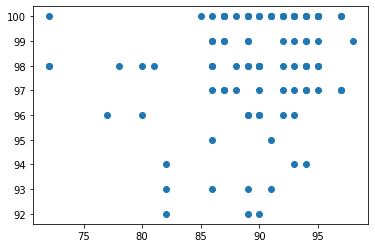

In [45]:
plt.scatter(df.audience_score, df.critic_score);

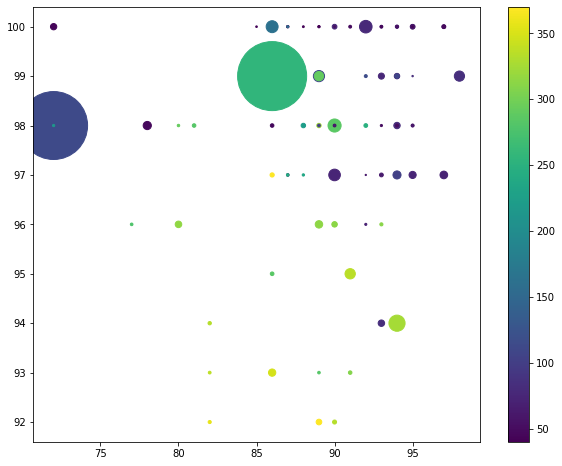

In [46]:
color = df.number_of_critic_ratings
size = df.number_of_audience_ratings/7000
plt.figure(figsize=(10, 8))
plt.scatter(df.audience_score, df.critic_score, s = size, c = color, cmap = 'viridis');
plt.colorbar();

<a id='Source: Downloading Files from the Internet'></a>

### Source: Downloading Files from the Internet


In [47]:
import requests
import os

In [48]:
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [49]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [50]:
response = requests.get(ebert_review_urls[0])

In [51]:
response

<Response [200]>

In [52]:
response.content

b'The Wizard of Oz (1939)\nhttp://www.rogerebert.com/reviews/great-movie-the-wizard-of-oz-1939\nAs a child I simply did not notice whether a movie was in color or not. The movies themselves were such an overwhelming mystery that if they wanted to be in black and white, that was their business. It was not until I saw "The Wizard of Oz" for the first time that I consciously noticed B&W versus color, as Dorothy was blown out of Kansas and into Oz. What did I think? It made good sense to me.\n\nThe switch from black and white to color would have had a special resonance in 1939, when the movie was made. Almost all films were still being made in black and white, and the cumbersome new color cameras came with a \xe2\x80\x9cTechnicolor consultant\xe2\x80\x9d from the factory, who stood next to the cinematographer and officiously suggested higher light levels. Shooting in color might have been indicated because the film was MGM\'s response to the huge success of Disney\'s pioneering color anima

In [53]:
for url in ebert_review_urls:
    response = requests.get(url)
    with open (os.path.join(folder_name, url.split('/')[-1]), 'wb')as file:
        file.write(response.content)
# wb stands for write binary

In [54]:
len(os.listdir(folder_name))

88

In [55]:
import glob

In [56]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    print(ebert_review)

ebert_reviews\1-the-wizard-of-oz-1939-film.txt
ebert_reviews\10-metropolis-1927-film.txt
ebert_reviews\100-battleship-potemkin.txt
ebert_reviews\11-e.t.-the-extra-terrestrial.txt
ebert_reviews\12-modern-times-film.txt
ebert_reviews\14-singin-in-the-rain.txt
ebert_reviews\15-boyhood-film.txt
ebert_reviews\16-casablanca-film.txt
ebert_reviews\17-moonlight-2016-film.txt
ebert_reviews\18-psycho-1960-film.txt
ebert_reviews\19-laura-1944-film.txt
ebert_reviews\2-citizen-kane.txt
ebert_reviews\20-nosferatu.txt
ebert_reviews\21-snow-white-and-the-seven-dwarfs-1937-film.txt
ebert_reviews\22-a-hard-day27s-night-film.txt
ebert_reviews\23-la-grande-illusion.txt
ebert_reviews\25-the-battle-of-algiers.txt
ebert_reviews\26-dunkirk-2017-film.txt
ebert_reviews\27-the-maltese-falcon-1941-film.txt
ebert_reviews\29-12-years-a-slave-film.txt
ebert_reviews\3-the-third-man.txt
ebert_reviews\30-gravity-2013-film.txt
ebert_reviews\31-sunset-boulevard-film.txt
ebert_reviews\32-king-kong-1933-film.txt
ebert_revi

In [57]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        print(file.read())
        break

The Wizard of Oz (1939)
http://www.rogerebert.com/reviews/great-movie-the-wizard-of-oz-1939
As a child I simply did not notice whether a movie was in color or not. The movies themselves were such an overwhelming mystery that if they wanted to be in black and white, that was their business. It was not until I saw "The Wizard of Oz" for the first time that I consciously noticed B&W versus color, as Dorothy was blown out of Kansas and into Oz. What did I think? It made good sense to me.

The switch from black and white to color would have had a special resonance in 1939, when the movie was made. Almost all films were still being made in black and white, and the cumbersome new color cameras came with a “Technicolor consultant” from the factory, who stood next to the cinematographer and officiously suggested higher light levels. Shooting in color might have been indicated because the film was MGM's response to the huge success of Disney's pioneering color animated feature, "Snow White and t

In [58]:
# To get the encoding value, go to the website and see the page source.

In [59]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        print(file.readline()[:-1]) # get rid of backslash
        break

The Wizard of Oz (1939)


In [60]:
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1] # get rid of backslash
        review_url = file.readline()[:-1]
        review_text = file.read()
        df_list.append({'title': title,
                       'review_url': review_url,
                       'review_text': review_text,})

In [61]:
import pandas as pd

In [62]:
df = pd.DataFrame(df_list, columns=['title', 'review_url', 'review_text'])

In [63]:
df.head()

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Metropolis (1927),http://www.rogerebert.com/reviews/great-movie-...,The opening shots of the restored “Metropolis”...
2,Battleship Potemkin (1925),http://www.rogerebert.com/reviews/great-movie-...,"""The Battleship Potemkin” has been so famous f..."
3,E.T. The Extra-Terrestrial (1982),http://www.rogerebert.com/reviews/great-movie-...,Dear Raven and Emil:\n\nSunday we sat on the b...
4,Modern Times (1936),http://www.rogerebert.com/reviews/modern-times...,"A lot of movies are said to be timeless, but s..."


<a id='Source: APIs (Application Programming Interfaces)'></a>

### Source: APIs (Application Programming Interfaces)

In [65]:
import rtsimple as rt

In [74]:
rt.API_KEY = 'YOUR API KEY HERE'
movie = rt.Movies('10489')
#movie.ratings('audience_score')

<a id='Relational Databases and pandas'></a>

### Relational Databases and pandas

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('bestofrt_master.csv')

In [77]:
df.head(3)

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89,874425
1,2,100,Citizen Kane (1941),75,90,157274
2,3,100,The Third Man (1949),77,93,53081


### 1. Connect to a database

In [78]:
from sqlalchemy import create_engine

In [79]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///bestofrt.db')

### 2. Store pandas DataFrame in database
Store the data in the cleaned master dataset (bestofrt_master) in that database.

In [80]:
# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard
df.to_sql('master1', engine, index=False)

### 3. Read database data into a pandas DataFrame
Read the brand new data in that database back into a pandas DataFrame.

In [82]:
df_gather = pd.read_sql('SELECT * FROM master1', engine)

In [83]:
df_gather.head(3)

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89,874425
1,2,100,Citizen Kane (1941),75,90,157274
2,3,100,The Third Man (1949),77,93,53081
